In [2]:
import pandas as pd
import skimage as img
import tqdm
from matplotlib import pyplot as plt

In [3]:
# Load the dataset
stare_diagnoses = pd.read_csv("../data/STARE/diagnoses.csv")
stare_optic_nerve_gt = pd.read_csv("../data/STARE/optic_nerve.csv")
stare_images = []

for i in tqdm.tqdm(range(len(stare_diagnoses))):
    stare_images.append(img.io.imread("../data/STARE/images/" + stare_diagnoses["ID"][i] + ".ppm"))

100%|██████████| 397/397 [00:05<00:00, 69.76it/s]


In [4]:
# Print the first 5 rows of the diagnoses dataframe
print(stare_diagnoses.head())
print(stare_diagnoses.shape)

       ID  Normal  Emboli  BRAO  CRAO  BRVO  CRVO  Hemi-CRVO  BDR/NPDR  PDR  \
0  im0001       0       0     0     0     0     0          0         1    0   
1  im0002       0       0     0     0     0     0          0         0    0   
2  im0003       0       0     0     0     0     0          0         0    0   
3  im0004       0       0     0     1     0     0          0         0    0   
4  im0005       0       0     0     1     0     1          0         0    0   

   ASR  HTR  Coats  Macroaneurism  CNV  Other  
0    0    0      0              0    0      0  
1    1    0      0              0    1      0  
2    0    0      0              0    0      1  
3    0    0      0              0    0      1  
4    0    0      0              0    0      0  
(397, 16)


In [5]:
# For each column in the diagnoses dataframe, print the number of unique values
for col in stare_diagnoses.columns:
    print(col + ":", stare_diagnoses[col].value_counts()[1])

ID: 1
Normal: 39
Emboli: 13
BRAO: 7
CRAO: 9
BRVO: 11
CRVO: 25
Hemi-CRVO: 12
BDR/NPDR: 70
PDR: 23
ASR: 33
HTR: 36
Coats: 14
Macroaneurism: 8
CNV: 61
Other: 158


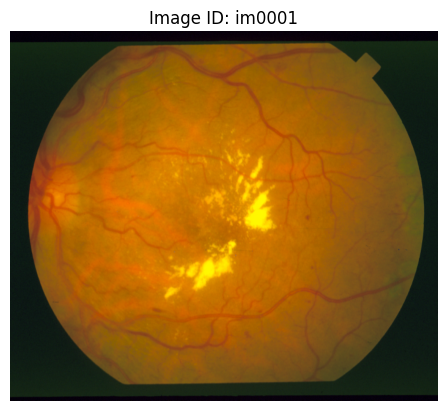

In [6]:
# Print the first image
plt.imshow(stare_images[0])
plt.title("Image ID: " + stare_diagnoses["ID"][0])
plt.axis("off")
plt.show()

In [7]:
# Split the optic nerve ground truth into training and testing data
train_optic_nerve_gt = stare_optic_nerve_gt.sample(frac=0.8, random_state=0)
test_optic_nerve_gt = stare_optic_nerve_gt.drop(train_optic_nerve_gt.index)

In [8]:
# Print the number of instances in the training and testing data.
print("Training instances:", train_optic_nerve_gt.shape[0])
print("Testing instances:", test_optic_nerve_gt.shape[0])

Training instances: 318
Testing instances: 79


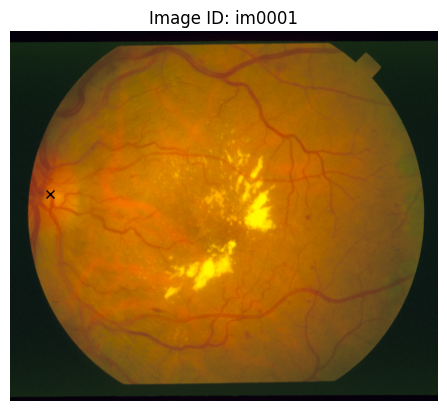

In [10]:
# Show the first image in the dataset with the optic nerve ground truth overlaid as a black cross.
plt.imshow(stare_images[0])
plt.title("Image ID: " + stare_diagnoses["ID"][0])
plt.plot(stare_optic_nerve_gt["x"][0], stare_optic_nerve_gt["y"][0], "kx")
plt.axis("off")
plt.show()